In [1]:
import numpy as np
import pandas as pd
X_train_resampled_final=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\X_train_resampled_final_AFTER.csv")

In [2]:
y_train_resampled_final=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\y_train_resampled_final_new.csv")

In [3]:
# Count the number of 0s
num_zeros = np.count_nonzero(y_train_resampled_final == 0)

# Count the number of 1s
num_ones = np.count_nonzero(y_train_resampled_final == 1)

print("Number of 0s:", num_zeros)
print("Number of 1s:", num_ones)

Number of 0s: 625134
Number of 1s: 346064


In [4]:
X_test=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\X_test_new.csv")

In [5]:
y_test=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\y_test_new.csv")

In [6]:
# Count the number of 0s
num_zeros = np.count_nonzero(y_test == 0)

# Count the number of 1s
num_ones = np.count_nonzero(y_test == 1)

print("Number of 0s:", num_zeros)
print("Number of 1s:", num_ones)

Number of 0s: 69912
Number of 1s: 38452


## PCA

In [7]:
from sklearn.decomposition import PCA
import numpy as np

# assuming X_train and X_test are your training and test data matrices
# standardize the data using the mean and std from the training set
X_train_mean = np.mean(X_train_resampled_final, axis=0)
X_train_std = np.std(X_train_resampled_final, axis=0)
# X_train_std[X_train_std == 0] = 1 # avoid division by zero
X_train_std_inv = 1 / X_train_std

X_train_stdized = (X_train_resampled_final - X_train_mean) * X_train_std_inv
X_test_stdized = (X_test - X_train_mean) * X_train_std_inv

# compute the covariance matrix for the training data
cov_matrix_train = np.cov(X_train_stdized.T)

# compute the eigenvectors and eigenvalues for the training data
eig_vals_train, eig_vecs_train = np.linalg.eig(cov_matrix_train)

# select the top k eigenvectors for the training data
# pca_train = PCA(n_components=len(X_train_resampled_final.columns))
pca_train = PCA(n_components=3)
X_train_pca = pca_train.fit_transform(X_train_stdized)

# project the test data onto the selected eigenvectors from the training data
X_test_pca = pca_train.transform(X_test_stdized)

In [8]:
import numpy as np
import pandas as pd

X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

In [9]:
import pandas as pd
import numpy as np

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(X_train_pca)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [10]:
X_test_pca_df = X_test_pca_df.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3'})

In [11]:
X_test_pca_df 

,PC1,PC2,PC3
0,155.924019,-22.535961,-53.733432
1,15.809945,-3.240295,-6.217091
2,5.399032,-0.588661,-1.817855
3,35.064579,30.176673,187.632473
4,2.336762,2.777391,1.080429
...,...,...,...
108359,1.070073,2.215855,17.023934
108360,65.607969,-9.640862,-23.287861
108361,270.637408,481.383204,322.066630
108362,-1.552019,4.362153,2.972969


In [12]:
X_train_pca_df = X_train_pca_df.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3'})

In [13]:
print(X_train_pca_df.columns)

Index(['PC1', 'PC2', 'PC3'], dtype='object')


In [14]:
X_train_pca_df

,PC1,PC2,PC3
0,1.791754,-1.158499,-1.309058
1,0.517721,-0.647314,-1.857160
2,1.659025,0.103435,2.511443
3,-0.140075,-0.282592,0.007689
4,-2.479722,-1.639817,-0.449262
...,...,...,...
971193,0.953282,1.735062,-0.402057
971194,0.252284,0.613944,-0.420303
971195,1.300706,2.385467,-0.764005
971196,0.971163,0.811154,-0.130944


In [15]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # create a PCA object
# pca = PCA()

# # fit the PCA object to your data
# pca.fit(X_train_pca)

# # get the eigenvalues
# eigenvalues = pca_train.explained_variance_

# # # create a scree plot
# # plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, 'o-', color='gray', linewidth=1, markersize=5)
# # plt.axhline(y=1, linestyle='--', color='black', linewidth=1)
# # plt.title('Scree Plot: PCA Eigenvalues')
# # plt.xlabel('Principal Components')
# # plt.ylabel('Eigenvalues')
# # plt.show()
# # create a scree plot with labeled coordinates
# plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, 'o-', color='gray', linewidth=1, markersize=5)

# # add coordinates as text labels
# for i, (x, y) in enumerate(zip(np.arange(1, len(eigenvalues)+1), eigenvalues)):
#     plt.text(x, y, f'({x}, {y:.2f})', ha='center', va='bottom', color='blue')

# plt.axhline(y=1, linestyle='--', color='black', linewidth=1)
# plt.title('Scree Plot: PCA Eigenvalues')
# plt.xlabel('Principal Components')
# plt.ylabel('Eigenvalues')
# plt.show()

In [16]:
# # calculate variance ratios
# variance=pca_train.explained_variance_ratio_
# variance
# var=np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=3)*100)

# plt.ylabel('% Variance Explained')
# plt.xlabel('Number of features')
# plt.title('PCA Variance Explained')
# plt.ylim(min(var),100.5)
# plt.style.context('seaborn-whitegrid')
# plt.axhline(y=80, color='r',linestyle='--')
# plt.plot(var)
# plt.show()

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Compute the cumulative explained variance
# explained_variance_ratio = pca_train.explained_variance_ratio_
# cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# # Plot the scree plot
# component_number = np.arange(1, len(explained_variance_ratio) + 1)
# plt.plot(component_number, explained_variance_ratio, marker='o', linestyle='-', color='b', label='Individual')
# plt.plot(component_number, cumulative_variance_ratio, marker='o', linestyle='-', color='r', label='Cumulative')

# plt.xlabel('Principal Component')
# plt.ylabel('Proportion of Variance Explained')
# plt.title('Scree Plot')
# plt.legend()
# plt.show()

In [18]:
import pandas as pd
import numpy as np

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(X_test_pca)

# Reset the index
df.reset_index(drop=True, inplace=True)

## Choose 6 PCA

In [19]:
X_test_pca_df=X_test_pca_df.iloc[:, :3]

In [20]:
X_test_pca_df

,PC1,PC2,PC3
0,155.924019,-22.535961,-53.733432
1,15.809945,-3.240295,-6.217091
2,5.399032,-0.588661,-1.817855
3,35.064579,30.176673,187.632473
4,2.336762,2.777391,1.080429
...,...,...,...
108359,1.070073,2.215855,17.023934
108360,65.607969,-9.640862,-23.287861
108361,270.637408,481.383204,322.066630
108362,-1.552019,4.362153,2.972969


In [21]:
X_train_pca_df=X_train_pca_df.iloc[:, :3]

In [22]:
X_train_pca_df

,PC1,PC2,PC3
0,1.791754,-1.158499,-1.309058
1,0.517721,-0.647314,-1.857160
2,1.659025,0.103435,2.511443
3,-0.140075,-0.282592,0.007689
4,-2.479722,-1.639817,-0.449262
...,...,...,...
971193,0.953282,1.735062,-0.402057
971194,0.252284,0.613944,-0.420303
971195,1.300706,2.385467,-0.764005
971196,0.971163,0.811154,-0.130944


In [20]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the parameter space to search over
# param_dist = {
#     'n_estimators': randint(100, 400),
#     'max_features': ['sqrt', 'log2','none'],
#     'max_depth': [None] + list(range(5, 20, 5)),
#     'min_samples_split': randint(2, 15),
#     'min_samples_leaf': randint(1, 15),
#     'bootstrap': [True, False]
# }

# # Initialize the Random Forest model
# rf_model = RandomForestClassifier()

# # Initialize the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     rf_model, 
#     param_distributions=param_dist,
#     n_iter=10,  # Number of iterations to sample from the parameter space
#     cv=3,  # Number of cross-validation folds to use
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train_pca_df, y_train_resampled_final)

# # Print the best hyperparameters and corresponding score
# print("Best hyperparameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

In [22]:
# #Plot circle
# #Create a list of 500 points with equal spacing between -1 and 1
# import numpy as np
# from sklearn.decomposition import PCA

# columns=X_train_resampled_final.columns.values #Store the name of the columns for labeling

# x=np.linspace(start=-1,stop=1,num=1000)
# #Find y1 and y2 for these points
# y_positive=lambda x: np.sqrt(1-x**2) 
# y_negative=lambda x: -np.sqrt(1-x**2)
# plt.plot(x,list(map(y_positive, x)), color='maroon')
# plt.plot(x,list(map(y_negative, x)),color='maroon')

# #Plot smaller circle
# x=np.linspace(start=-0.5,stop=0.5,num=500)
# y_positive=lambda x: np.sqrt(0.5**2-x**2) 
# y_negative=lambda x: -np.sqrt(0.5**2-x**2)
# plt.plot(x,list(map(y_positive, x)), color='maroon')
# plt.plot(x,list(map(y_negative, x)),color='maroon')

# #Create broken lines
# x=np.linspace(start=-1,stop=1,num=30)
# plt.scatter(x,[0]*len(x), marker='_',color='maroon')
# plt.scatter([0]*len(x), x, marker='|',color='maroon')

# pca_values=pca_train.components_
# #Define color list
# colors = ['pink', 'green','purple', 'blue','red','black']
# if len(pca_values[0]) > 5:
#     colors=colors*(int(len(pca_values[0])/5)+1)
    
#     add_string=""
#     for i in range(6):
#         xi=pca_values[0][i]
#         yi=pca_values[1][i]
#         plt.arrow(0,0, 
#                   dx=xi, dy=yi, 
#                   head_width=0.03, head_length=0.03, 
#                   color=colors[i], length_includes_head=True)
#         add_string=f" ({round(xi,2)} {round(yi,2)})"
# #         plt.text(pca_values[0, i], 
# #                  pca_values[1, i] , 
# #                  s=columns[i] + add_string,
# #                  fontsize=5)
#         plt.text(pca_values[0, i] + 0.0, pca_values[1, i] + 0.07, s=columns[i] + add_string, fontsize=8)
        
# plt.xlabel(f"Component 1 ({round(pca_train.explained_variance_ratio_[0]*100,2)}%)")
# plt.ylabel(f"Component 2 ({round(pca_train.explained_variance_ratio_[1]*100,2)}%)")
# plt.title('Variable factor map (PCA)')
# plt.show()

In [23]:
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold

# n_folds = 2
# kf = KFold(n_splits=n_folds, shuffle=True)

# rf_model = RandomForestClassifier()

# # Reset the index of X_train_pca_df
# X_train_pca_df.reset_index(drop=True, inplace=True)

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_pca_df)):
#     # Split the data into training and validation sets
#     X_fold_train, y_fold_train = X_train_pca_df.iloc[train_idx].values, y_train_resampled_final[train_idx]
#     X_val, y_val = X_train_pca_df.iloc[val_idx].values, y_train_resampled_final[val_idx]
    
#     # Train and evaluate the model
#     rf_model.fit(X_fold_train, y_fold_train)
#     y_pred = rf_model.predict(X_val)
#     score = rf_model.score(X_val, y_val)
    
#     # Print fold information, confusion matrix, and classification report
#     print(f"Fold {fold+1}")
#     print(f"Confusion matrix:")
#     print(confusion_matrix(y_val, y_pred))
#     print(f"Classification report:")
#     print('---------------------')
#     print(classification_report(y_val, y_pred))

In [24]:
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold

# n_folds = 2
# kf = KFold(n_splits=n_folds, shuffle=True)

# # # Variables to store the training and validation scores
# # train_scores = []
# # val_scores = []

# precision_list = []
# recall_list = []
# f1_list = []

# rf_model = RandomForestClassifier(random_state=8, oob_score=True)

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_pca_df)):
#     # Split the data into training and validation sets
#     X_fold_train, y_fold_train = X_train_pca_df.iloc[train_idx].values, y_train_resampled_final[train_idx]
#     X_val, y_val = X_train_pca_df.iloc[val_idx].values, y_train_resampled_final[val_idx]
    
#     # Train the random forest model
#     rf_model.fit(X_fold_train, y_fold_train)
    
#     y_pred = rf_model.predict(X_val)
    
#     # Print confusion matrix
#     print(f"Confusion matrix for fold {fold+1}:")
#     print(confusion_matrix(y_val, y_pred))
    
#     # Calculate precision, recall, and f1 score for this fold
#     report = classification_report(y_val, y_pred, output_dict=True)
#     precision_list.append(report['weighted avg']['precision'])
#     recall_list.append(report['weighted avg']['recall'])
#     f1_list.append(report['weighted avg']['f1-score'])
    
#     # Print classification report
#     print(f"Classification report for fold {fold+1}:")
#     print(classification_report(y_val, y_pred))
#     print('--------------------------------------')

# # Calculate average precision, recall, and f1 score across all folds
# avg_precision = sum(precision_list) / n_folds
# avg_recall = sum(recall_list) / n_folds
# avg_f1 = sum(f1_list) / n_folds

# # Get the OOB score
# oob_score = rf_model.oob_score_

# print(f"Average precision: {avg_precision:.2f}")
# print(f"Average recall: {avg_recall:.2f}")
# print(f"Average F1 score: {avg_f1:.2f}")
# print(f"OOB score: {oob_score:.2f}")

In [25]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# import lightgbm as lgb

# n_folds = 4
# kf = KFold(n_splits=n_folds, shuffle=True)

# train_loss_list = []
# val_loss_list = []

# lgb_model = lgb.LGBMClassifier(random_state=8)

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_pca_df)):
#     # Split the data into training and validation sets
#     X_fold_train, y_fold_train = X_train_pca_df.iloc[train_idx].values, y_train_resampled_final.iloc[train_idx].values.ravel()
#     X_val, y_val = X_train_pca_df.iloc[val_idx].values, y_train_resampled_final.iloc[val_idx].values.ravel()
    
#     # Train the LightGBM model
#     lgb_model.fit(
#         X_fold_train,
#         y_fold_train,
#         eval_set=[(X_fold_train, y_fold_train), (X_val, y_val)],
#         eval_names=['Training', 'Validation'],
#         eval_metric='cross_entropy',
#         verbose=False,
#     )
    
#     # Retrieve the evaluation results
#     train_results = lgb_model.evals_result_['Training']['cross_entropy']
#     val_results = lgb_model.evals_result_['Validation']['cross_entropy']
    
#     # Track the loss values for the learning curve
#     train_loss_list.append(train_results)
#     val_loss_list.append(val_results)
    
# # Calculate and plot the learning curve
# train_loss_mean = np.mean(train_loss_list, axis=0)
# val_loss_mean = np.mean(val_loss_list, axis=0)

# plt.figure(figsize=(8, 5))
# plt.plot(train_loss_mean, label='Training')
# plt.plot(val_loss_mean, label='Validation')
# plt.xlabel('Number of Boosting Rounds')
# plt.ylabel('Cross-Entropy Loss')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

## Hyper-parameter tuning

In [26]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import lightgbm as lgb
from scipy.stats import randint as sp_randint

# Define the hyperparameter space to search over
param_dist = {
    'boosting_type': ['gbdt', 'rf', 'dart'],
    'num_leaves': sp_randint(4, 30),
    'learning_rate': [0.05, 0.1, 0.5],
    'n_estimators': sp_randint(20,70),
    'max_depth': sp_randint(3, 15),
    'min_child_samples': sp_randint(10, 45),
    'min_split_gain': [0, 0.01, 0.1, 1],
    'reg_alpha': [0.0, 0.1, 0.3],
    'scale_pos_weight': [1, 2, 3, 4],
    'tree_learner': ['serial', 'feature', 'data', 'voting'],
    'bagging_freq': sp_randint(1, 10),
    'bagging_fraction': [0.1, 0.5, 0.9],  # Added bagging_fraction parameter
}

# Define the estimator object
estimator = lgb.LGBMClassifier()

# Instantiate a HalvingRandomSearchCV object
halving_cv = HalvingRandomSearchCV(
    estimator=estimator,
    param_distributions=param_dist,
    factor=2,
    resource='n_samples',
    max_resources=100,
    random_state=42,
    cv=5,
)

# Fit the HalvingRandomSearchCV object to the training data
halving_cv.fit(X_train_pca_df, y_train_resampled_final)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagg

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagg

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagg

KeyboardInterrupt: 

In [ ]:
print(halving_cv.best_params_)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Define the LightGBM classifier
model = LGBMClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Replace with your desired scoring metric
    cv=2  # Number of cross-validation folds
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_pca_df, y_train_resampled_final)

# Get the best model and best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model and best hyperparameters
print("Best Model:", best_model)
print("Best Hyperparameters:", best_params)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Define the LightGBM classifier
model = LGBMClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Replace with your desired scoring metric
    cv=2  # Number of cross-validation folds
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_pca_df, y_train_resampled_final)

# Get the best model and best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model and best hyperparameters
print("Best Model:", best_model)
print("Best Hyperparameters:", best_params)

In [ ]:
# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# import lightgbm as lgb
# import matplotlib.pyplot as plt

# n_folds = 2
# kf = KFold(n_splits=n_folds, shuffle=True)

# precision_list = []
# recall_list = []
# f1_list = []

# train_loss_list = []
# val_loss_list = []

# #lgb_model = lgb.LGBMClassifier(random_state=8,objective='binary',metric='binary_logloss',boosting_type= 'dart',learning_rate= 0.05,max_depth=-1,min_child_samples= 20, min_split_gain= 0.01,n_estimators= 100, num_leaves=27, tree_learner= 'voting',scale_pos_weight=3,reg_alpha=0.1,bagging_freq=2,bagging_fraction=0.1)
# lgb_model = lgb.LGBMClassifier(random_state=8,objective='binary',metric='binary_logloss',boosting_type= 'dart')
# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_pca_df)):
#     # Split the data into training and validation sets
#     X_fold_train, y_fold_train = X_train_pca_df.iloc[train_idx].values, y_train_resampled_final.iloc[train_idx].values.ravel()
#     X_val, y_val = X_train_pca_df.iloc[val_idx].values, y_train_resampled_final.iloc[val_idx].values.ravel()

#     # Train the LightGBM model
#     lgb_model.fit(
#         X_fold_train,
#         y_fold_train,
#         eval_set=[(X_fold_train, y_fold_train), (X_val, y_val)],
#         eval_names=['Training', 'Validation'],
#         eval_metric='cross_entropy',
#         verbose=False,
#     )
    
#     # Retrieve the evaluation results
#     train_results = lgb_model.evals_result_['Training']['cross_entropy']
#     val_results = lgb_model.evals_result_['Validation']['cross_entropy']
    
#     # Track the loss values for the learning curve
#     train_loss_list.append(train_results)
#     val_loss_list.append(val_results)
    
#     y_pred = lgb_model.predict(X_val)
    
#     # Print confusion matrix
#     print(f"Confusion matrix for fold {fold+1}:")
#     print(confusion_matrix(y_val, y_pred))
    
#     # Calculate precision, recall, and f1 score for this fold
#     report = classification_report(y_val, y_pred, output_dict=True)
#     precision_list.append(report['weighted avg']['precision'])
#     recall_list.append(report['weighted avg']['recall'])
#     f1_list.append(report['weighted avg']['f1-score'])
    
#     # Print classification report
#     print(f"Classification report for fold {fold+1}:")
#     print(classification_report(y_val, y_pred))
#     print('--------------------------------------')
    

# # Calculate and plot the learning curve
# train_loss_mean = np.mean(train_loss_list, axis=0)
# val_loss_mean = np.mean(val_loss_list, axis=0)

# plt.figure(figsize=(8, 5))
# plt.plot(train_loss_mean, label='Training')
# plt.plot(val_loss_mean, label='Validation')
# plt.xlabel('Number of Boosting Rounds')
# plt.ylabel('Cross-Entropy Loss')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

# # Calculate average precision, recall, and f1 score across all folds
# avg_precision = sum(precision_list) / n_folds
# avg_recall = sum(recall_list) / n_folds
# avg_f1 = sum(f1_list) / n_folds

# print(f"Average precision: {avg_precision:.2f}")
# print(f"Average recall: {avg_recall:.2f}")
# print(f"Average F1 score: {avg_f1:.2f}")

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and the class column is called 'class'
class0 = df_sample[df_sample['isFraud'] == 0]
class1 = df_sample[df_sample['isFraud'] == 1]

s = 5
plt.scatter(class0['step'], class0['oldbalanceOrg'], color='blue', label='Class 0',marker='.', s=s)
plt.scatter(class1['step'], class1['oldbalanceOrg'], color='red', label='Class 1',marker='.', s=s)

plt.legend()
plt.xlabel('step')
plt.ylabel('oldbalanceOrg')
plt.title('Scatter plot of two classes')

plt.show()

In [ ]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Instantiate an SVM classifier with a large C hyperparameter
svm_classifier = svm.SVC(C=1000, kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train_pca_df, y_train_resampled_final.values.ravel())  # Convert y_train_resampled_final to a NumPy array and reshape it using ravel()

# Classify the training set using the trained SVM
train_predictions = svm_classifier.predict(X_train_pca_df)

# Calculate the accuracy of the SVM on the training set
accuracy = (train_predictions == y_train_resampled_final.values.ravel()).mean() * 100  # Convert y_train_resampled_final to a NumPy array and reshape it using ravel()

# Check if the data is linearly separable based on the training accuracy
if accuracy == 100:
    print("The data is linearly separable.")
else:
    print("The data is not linearly separable.")

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Define the LightGBM classifier
model = LGBMClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'extra_trees': [True, False],
    'max_delta_step': [0.1, 0.2, 0.3],
    'lambda_l2': [0.1, 0.5, 1.0],
    'max_drop': [5, 10, 15],
    'is_unbalance': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Replace with your desired scoring metric
    cv=2  # Number of cross-validation folds
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_pca_df, y_train_resampled_final)

# Get the best model and best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model and best hyperparameters
print("Best Model:", best_model)
print("Best Hyperparameters:", best_params)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Confusion matrix for fold 1:
[[284786  27661]
 [  8327 164825]]
Classification report for fold 1:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94    312447
           1       0.86      0.95      0.90    173152

    accuracy                           0.93    485599
   macro avg       0.91      0.93      0.92    485599
weighted avg       0.93      0.93      0.93    485599

--------------------------------------


C:\Users\23059\anaconda3\envs\test2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Confusion matrix for fold 2:
[[284835  27852]
 [  8478 164434]]
Classification report for fold 2:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94    312687
           1       0.86      0.95      0.90    172912

    accuracy                           0.93    485599
   macro avg       0.91      0.93      0.92    485599
weighted avg       0.93      0.93      0.93    485599

--------------------------------------


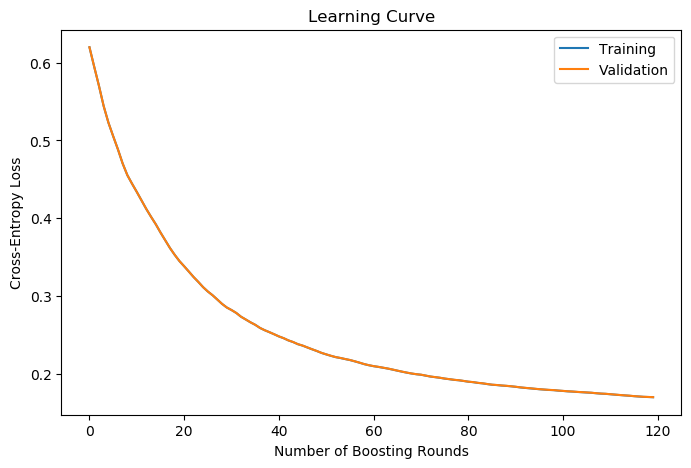

Average precision: 0.93
Average recall: 0.93
Average F1 score: 0.93


In [23]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
import lightgbm as lgb
import matplotlib.pyplot as plt

n_folds = 2
kf = KFold(n_splits=n_folds, shuffle=True)

precision_list = []
recall_list = []
f1_list = []

train_loss_list = []
val_loss_list = []

# train_error_list = []
# test_error_list = []

#lgb_model = lgb.LGBMClassifier(random_state=8, objective='binary', boosting_type='dart',metric='binary_logloss', max_depth=6,min_child_samples=25, n_estimators=50,is_unbalance=True,extra_trees=True,learning_rate=0.1,reg_lambda=0.2,min_split_gain_=0.03)
lgb_model = lgb.LGBMClassifier(random_state=8,is_unbalance=True,n_estimators=120,max_depth=6,learning_rate=0.05,min_child_samples=29,extra_trees=True,reg_lambda=0.03)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_pca_df)):
    # Split the data into training and validation sets
    X_fold_train, y_fold_train = X_train_pca_df.iloc[train_idx].values, y_train_resampled_final.iloc[train_idx].values.ravel()
    X_val, y_val = X_train_pca_df.iloc[val_idx].values, y_train_resampled_final.iloc[val_idx].values.ravel()

    # Train the LightGBM model
    lgb_model.fit(
        X_fold_train,
        y_fold_train,
        eval_set=[(X_fold_train, y_fold_train), (X_val, y_val)],
        eval_names=['Training', 'Validation'],
        eval_metric='cross_entropy',
        verbose=False,
    )
    
    # Retrieve the evaluation results
    train_results = lgb_model.evals_result_['Training']['cross_entropy']
    val_results = lgb_model.evals_result_['Validation']['cross_entropy']
    
    # Track the loss values for the learning curve
    train_loss_list.append(train_results)
    val_loss_list.append(val_results)
    
    # Calculate predictions on the training and validation sets
    y_train_pred = lgb_model.predict(X_fold_train)
    y_val_pred = lgb_model.predict(X_val)
    
#     # Calculate train and test errors
#     train_error = 1 - lgb_model.score(X_fold_train, y_fold_train)
#     test_error = 1 - lgb_model.score(X_test_pca_df, y_test)
    
#     train_error_list.append(train_error)
#     test_error_list.append(test_error)
    
    # Print confusion matrix
    print(f"Confusion matrix for fold {fold+1}:")
    print(confusion_matrix(y_val, y_val_pred))
    
    # Calculate precision, recall, and f1 score for this fold
    report = classification_report(y_val, y_val_pred, output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    
    # Print classification report
    print(f"Classification report for fold {fold+1}:")
    print(classification_report(y_val, y_val_pred))
    print('--------------------------------------')
    

# Calculate and plot the learning curve
train_loss_mean = np.mean(train_loss_list, axis=0)
val_loss_mean = np.mean(val_loss_list, axis=0)

plt.figure(figsize=(8, 5))
plt.plot(train_loss_mean, label='Training')
plt.plot(val_loss_mean, label='Validation')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Cross-Entropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# avg_train_error = sum(train_error_list) / n_folds
# avg_test_error = sum(test_error_list) / n_folds
# print(f"Average train error: {avg_train_error:.2f}")
# print(f"Average test error: {avg_test_error:.2f}")

# Calculate average precision, recall, and f1 score across all folds
avg_precision = sum(precision_list) / n_folds
avg_recall = sum(recall_list) / n_folds
avg_f1 = sum(f1_list) / n_folds

print(f"Average precision: {avg_precision:.2f}")
print(f"Average recall: {avg_recall:.2f}")
print(f"Average F1 score: {avg_f1:.2f}")

In [24]:
from sklearn.metrics import classification_report

# Get predictions on test set
y_pred = lgb_model.predict(X_test_pca_df)

# Convert predicted probabilities to class labels
y_pred = (y_pred > 0.2).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82     69912
           1       0.84      0.29      0.43     38452

    accuracy                           0.73    108364
   macro avg       0.78      0.63      0.62    108364
weighted avg       0.76      0.73      0.68    108364



In [25]:
# Evaluate the model on the test set
#loss, accuracy = lgb_model.evaluate(X_test_pca_df, y_test)

# Generate predicted probabilities for the test set
y_pred_prob = lgb_model.predict(X_test_pca_df)

# Set the threshold for converting probabilities to class labels
threshold = 0.02

# Convert predicted probabilities to class labels using the threshold
y_pred = (y_pred_prob > threshold).astype(int)

# # Convert the predictions to binary values
# y_pred_binary = np.round(y_pred)

# Calculate the f1 score, precision, and recall
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
#print('Test Loss:', loss)
# print('Test Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

F1 Score: 0.4270072992700729
Precision: 0.8421133231240429
Recall: 0.2860189326953084


In [26]:
from sklearn.metrics import confusion_matrix

# assuming y_true and y_pred are your true and predicted labels respectively
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[67850  2062]
 [27454 10998]]


In [27]:
# Assuming you have already trained your LightGBM model and obtained predictions
# Make predictions on the test set with probability scores
y_pred_proba = lgb_model.predict_proba(X_test_pca_df)

# Set the desired threshold value
threshold = 0.15
# Adjust the classification threshold
y_pred_adjusted = (y_pred_proba[:, 1] > threshold).astype(int)

# Calculate classification report with adjusted threshold
classification_report_adjusted = classification_report(y_test, y_pred_adjusted)

# Print the classification report
print(f"Classification Report (Adjusted Threshold = {threshold}):")
print(classification_report_adjusted)

Classification Report (Adjusted Threshold = 0.15):
              precision    recall  f1-score   support

           0       0.73      0.93      0.82     69912
           1       0.74      0.36      0.49     38452

    accuracy                           0.73    108364
   macro avg       0.73      0.65      0.65    108364
weighted avg       0.73      0.73      0.70    108364



In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

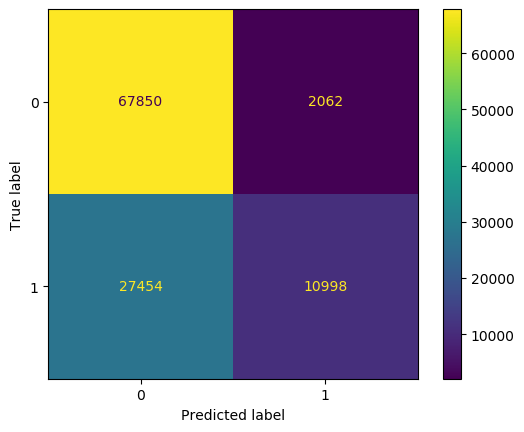

In [30]:
ConfusionMatrixDisplay.from_estimator(lgb_model , X_test_pca_df, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict the class labels and probabilities for the test set
y_test_pred = lgb_model.predict(X_test_pca_df)
y_test_prob = lgb_model.predict_proba(X_test_pca_df)[:, 1]
# Compute the false positive rate, true positive rate, and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC =%0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")
plt.show()

## Print tree

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Define figure size and DPI
fig, ax = plt.subplots(figsize=(50,50), dpi=100)

# Set font size
plt.rcParams.update({'font.size': 18})

# Define node attributes with desired color scheme
node_attr = {'shape': 'box', 'style': 'filled', 'fillcolor': '#ffffff', 'color': 'black', 'penwidth': '1.2', 'fontname': 'Arial', 'fontsize': '10'}

# Set leaf node color to green
node_attr['fillcolor'] = 'green'

# Plot the first tree with colored leaf nodes
lgb.plot_tree(lgb_model, tree_index=0, ax=ax, show_info=['split_gain', 'internal_value', 'internal_count'], node_attr=node_attr)

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# use the first 2 columns of X_train_pca_df to generate the meshgrid
X = X_train_pca_df.iloc[:, :2].values
y = y_train_resampled_final.values

# define the meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# predict the class labels for each meshgrid point
Z = lgb_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape),
                             np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])
Z = Z.reshape(xx.shape)

# plot the decision boundary with a different color map
plt.contourf(xx, yy, Z, alpha=0.4, cmap='cividis')

# define a list of colors for the class labels as hexadecimal values
colors = ['#0000cc', '#ff99cc']  # customize the colors here

# plot the training points for each class label with different colors and a small border
for i, label in enumerate(np.unique(y)):
    class_indices = np.where(y == label)
    plt.scatter(X[class_indices, 0], X[class_indices, 1], alpha=0.7, s=10, label=str(label), color=colors[i], edgecolors='black')

# add colorbar
plt.colorbar()

# add title and axis labels
plt.title("Decision Boundary with Training Points", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)

# add legend
plt.legend()

plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # use the first 2 columns of X_train_pca_df to generate the meshgrid
# X = X_train_pca_df.iloc[:, :2].values
# y = y_train_resampled_final.values

# # define the meshgrid
# h = 0.02  # step size in the mesh
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # predict the class labels for each meshgrid point
# Z = lgb_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape),
#                              np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])
# Z = Z.reshape(xx.shape)

# # plot the decision boundary with a different color map
# plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# # define a list of colors for the class labels
# colors = ['black', 'green']  # customize the colors here

# # plot the training points for each class label with different colors
# for i, label in enumerate(np.unique(y)):
#     class_indices = np.where(y == label)
#     plt.scatter(X[class_indices, 0], X[class_indices, 1], alpha=0.5, s=5, label=str(label), color=colors[i])

# # add colorbar
# plt.colorbar()

# # add title and axis labels
# plt.title("Decision Boundary with Training Points", fontsize=12)
# plt.xlabel("PC1", fontsize=12)
# plt.ylabel("PC2", fontsize=12)

# # add legend
# plt.legend()

# plt.show()